<a href="https://colab.research.google.com/github/koppalamounika/mini-project/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MALL CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING**

In [ ]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading the dataset

data = pd.read_csv("/content/drive/MyDrive/Mall_Customers.xls")

In [ ]:
# dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# head() displays the values of first 5 rows of the dataset 

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# describe is used to calculate some statistical data like mean,std etc...

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# finding null values

data.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

 we drop customer id column as it is of no use and gender,age,annual income columns are used in the process of clustering.
 Each of these three columns is clustered separately on the basis of spending score and elbow method is used to calcualate no.of clusters.
 

In [ ]:
# dropping customer id column

data.drop(['CustomerID'], axis = 1)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Pie chart for gender analysis

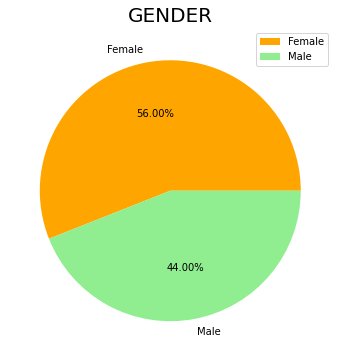

In [ ]:
mylabels = ["Female","Male"]
info = data['Genre'].value_counts()
colors = ['orange','lightgreen']
plt.rcParams['figure.figsize'] = (6,6)
plt.pie(info,colors = colors,labels = mylabels,autopct = '%.2f%%')
plt.title('GENDER',fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

histogram for counting of age class 

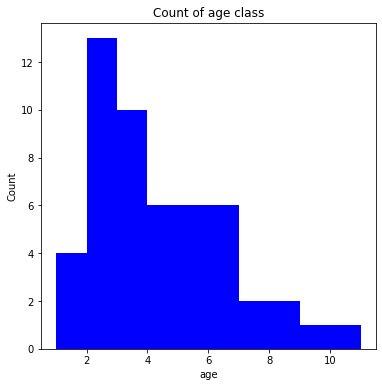

In [ ]:
plt.hist(data['Age'].value_counts(),color = 'blue')
plt.title('Count of age class')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

histogram for spending score analysis

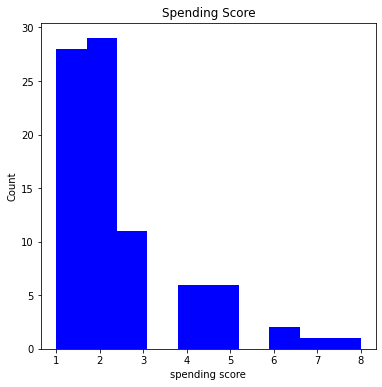

In [ ]:
plt.hist(data['Spending Score (1-100)'].value_counts(),color = 'blue')
plt.title('Spending Score')
plt.xlabel('spending score')
plt.ylabel('Count')
plt.show()

histogram for annual income

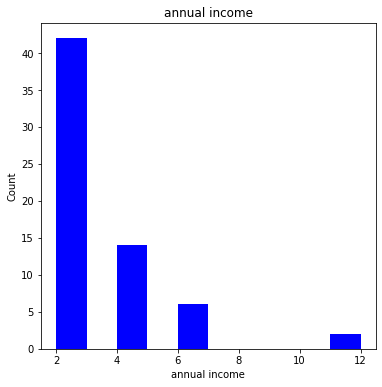

In [ ]:
plt.hist(data['Annual Income (k$)'].value_counts(),color = 'blue')
plt.title('annual income')
plt.xlabel('annual income')
plt.ylabel('Count')
plt.show()

Clustering based on annual income

In [ ]:
# here we consider 3rd and 4th columns 

x = data.iloc[:, [3,4]].values
print(x.shape)

(200, 2)


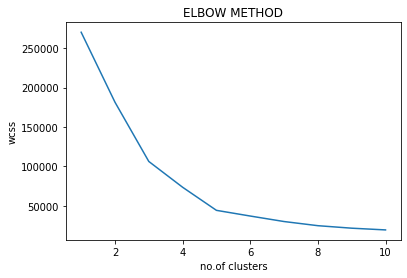

In [ ]:
# elbow method to find no.of clusters 
# wcss is the sum of squared distance between each point and the centroid in a cluster 

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("no.of clusters")
plt.ylabel("wcss")
plt.show()

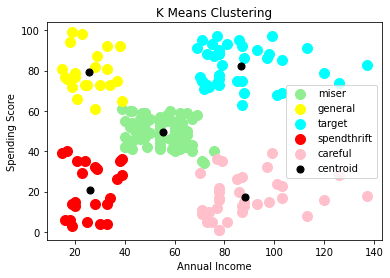

In [ ]:
# kmeans clustering with regard to annual income and spending score

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'lightgreen', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'red', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'pink', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Clustering based on ages

In [ ]:
# here we consider 2nd and 4th columns 

x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

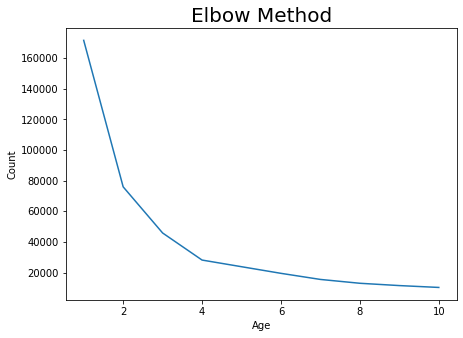

In [ ]:
# elbow method to find no.of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

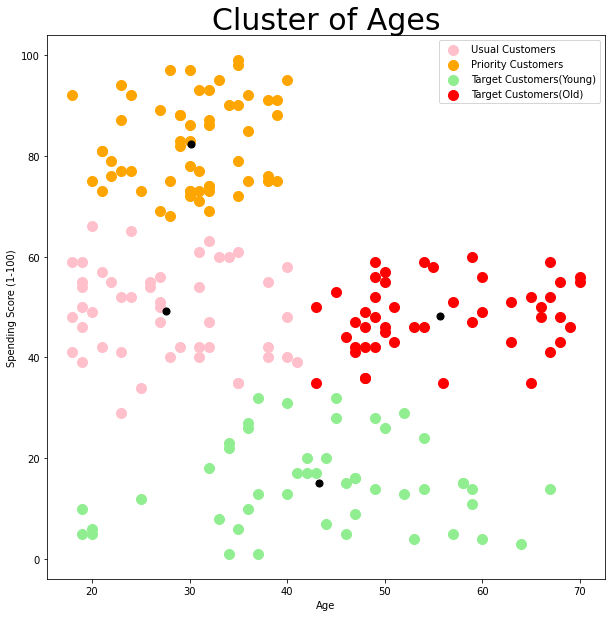

In [ ]:
# kmeans clustering with regard to ages and spending score

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Clustering based on gender

In [ ]:
# as gender column is not an integer value we replace the values male and female as 0 and 1 respectively

data['Genre'].replace(['Male', 'Female'], [0, 1], inplace = True)
data['Genre'].value_counts()

1    112
0     88
Name: Genre, dtype: int64

In [ ]:
# here we consider 1st and 4th columns

x = data.iloc[:, [1, 4]].values
x.shape

(200, 2)

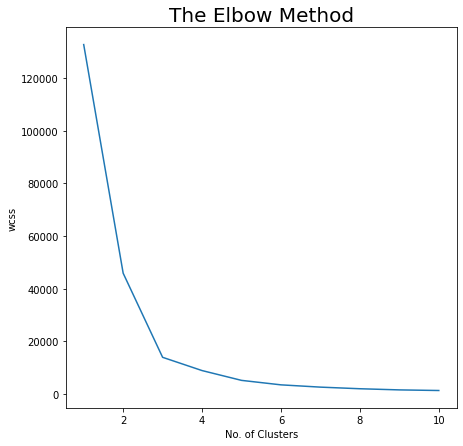

In [ ]:
# kmeans clustering with regard to gender and spending score

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
plt.rcParams['figure.figsize'] = (7, 7)
plt.title('The Elbow Method', fontsize = 20)
plt.plot(range(1, 11), wcss)
plt.xlabel('No. of Clusters', fontsize = 10)
plt.ylabel('wcss')
plt.show()

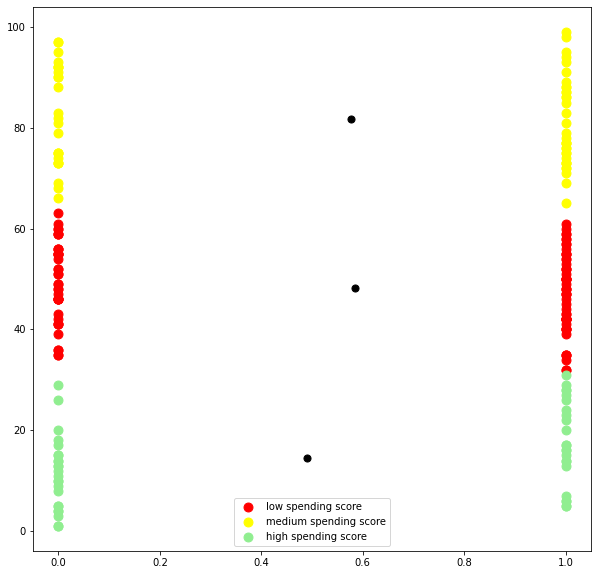

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 80, c = 'red', label = 'low spending score')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 80, c = 'yellow', label = 'medium spending score')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 80, c = 'lightgreen', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'black')
plt.legend()
plt.show()